# 시계열 예측 문제
- 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만듦

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

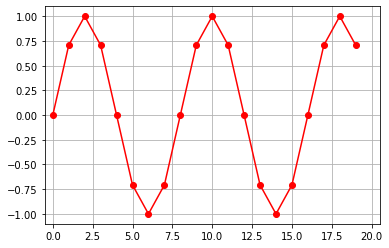

In [19]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s,'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

### 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환
#### (대각선 위의 성분들이 같은 정사각 행렬)

In [20]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [21]:
S.shape

(19, 20)

In [22]:
X_train = S[:-1, :3][:,:,np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape 

((18, 3, 1), (18,))

In [23]:
Y_train[:3]

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01])

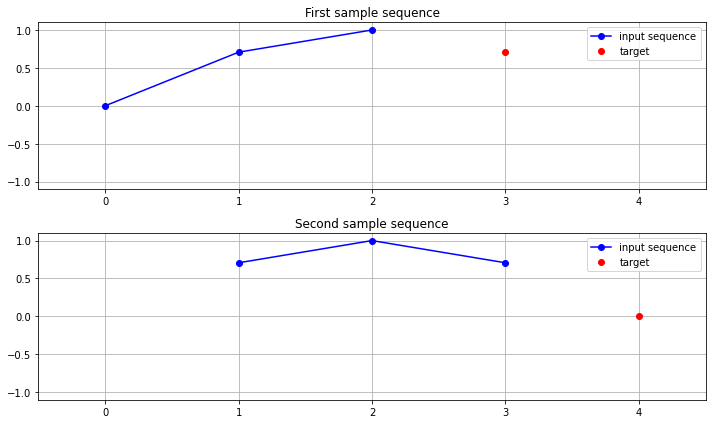

In [24]:
plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("First sample sequence")

plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Second sample sequence")

plt.tight_layout()
plt.show()

## RNN으로 해결 - SimpleRNN() 사용

In [25]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

seed = 2020
np.random.seed(seed)

In [26]:
model = Sequential([
                    SimpleRNN(10, input_shape = X_train.shape[1:]),
                    Dense(1, activation="linear")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='mse',optimizer='sgd')

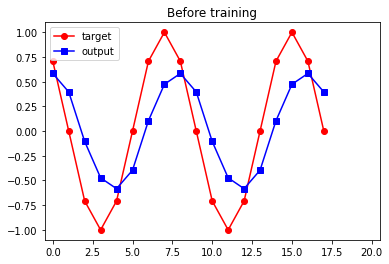

In [28]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [29]:
history = model.fit(X_train, Y_train, epochs=100,verbose=0)

#### 결과 확인

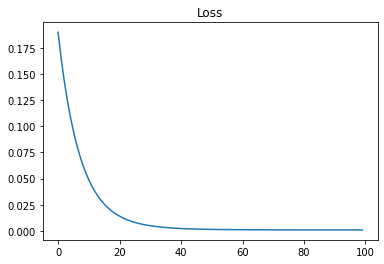

In [30]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.show()

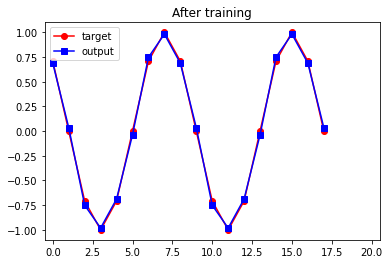

In [31]:
plt.plot(Y_train,'ro-', label='target')
plt.plot(model.predict(X_train[:,:,:]),'bs-', label='output')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

In [32]:
# 입력에 대한 weights
model.weights[0]

<tf.Variable 'simple_rnn_1/simple_rnn_cell_1/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[-0.6861799 , -0.45476574,  0.49852845,  0.31697798, -0.29733697,
         0.11569428,  0.22940378,  0.63899916, -0.6519218 ,  0.3702493 ]],
      dtype=float32)>

In [33]:
# 유닛에 대한 weights
model.weights[1]

<tf.Variable 'simple_rnn_1/simple_rnn_cell_1/recurrent_kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[-0.24030559,  0.13636881, -0.169914  , -0.4104669 ,  0.43413317,
         0.15717003, -0.0458567 ,  0.4239132 ,  0.06982181, -0.593969  ],
       [ 0.20891185, -0.4794357 , -0.32993525,  0.39716285, -0.07560938,
         0.44390795, -0.37013507,  0.01890579,  0.25819394, -0.288085  ],
       [ 0.44977123,  0.11054236, -0.2003631 , -0.20122387, -0.05166582,
         0.5749073 ,  0.3502782 ,  0.15089683, -0.52701664,  0.11535707],
       [-0.06632812,  0.12546565,  0.3968901 , -0.29461324, -0.25599402,
         0.22324248, -0.5912115 , -0.35396168, -0.29592448, -0.21998182],
       [-0.741486  ,  0.09332495, -0.23922183,  0.0951167 , -0.24732843,
         0.40187448,  0.28144592, -0.2915441 ,  0.09754366,  0.02096412],
       [ 0.02036863, -0.08436836, -0.19783646, -0.33254528, -0.7894787 ,
        -0.23209423,  0.01742049,  0.37647226,  0.10417067, -0.09669414],
       [ 0.18151

In [34]:
# bias
model.weights[2]

<tf.Variable 'simple_rnn_1/simple_rnn_cell_1/bias:0' shape=(10,) dtype=float32, numpy=
array([ 6.1222614e-04,  1.3364866e-04, -1.6188142e-03, -9.8183227e-04,
        3.1076523e-04, -7.2266106e-05,  1.8130773e-03, -1.9620160e-04,
       -1.1158504e-05,  6.4662541e-04], dtype=float32)>

### RNN Node가 5인 경우

In [40]:
model = Sequential([
                    SimpleRNN(5, input_shape = X_train.shape[1:]),
                    Dense(1, activation="linear")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='mse',optimizer='sgd')

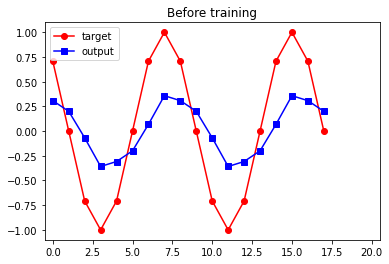

In [42]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [43]:
history = model.fit(X_train, Y_train, epochs=100,verbose=0)

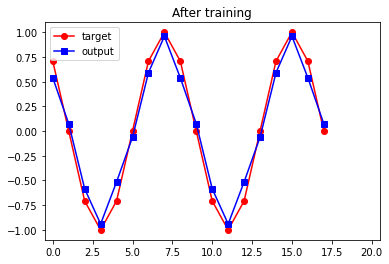

In [44]:
plt.plot(Y_train,'ro-', label='target')
plt.plot(model.predict(X_train[:,:,:]),'bs-', label='output')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

### RNN Node가 20인 경우

In [45]:
model = Sequential([
                    SimpleRNN(20, input_shape = X_train.shape[1:]),
                    Dense(1, activation="linear")
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='mse',optimizer='sgd')

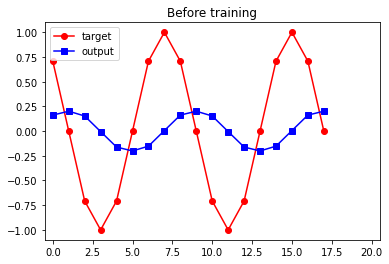

In [47]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [48]:
history = model.fit(X_train, Y_train, epochs=100,verbose=0)

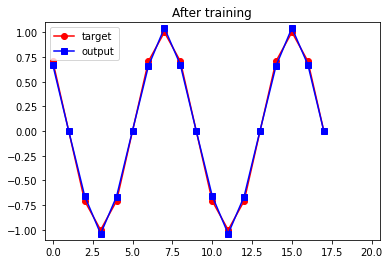

In [49]:
plt.plot(Y_train,'ro-', label='target')
plt.plot(model.predict(X_train[:,:,:]),'bs-', label='output')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()